The name of my capstone project is "Comparing Tech Salaries by Job Title with Seniority Levels and Company Size".

After setting up my virtual environment and installing the panda and requests packages, I created an initial requirements.txt. I will now begin to access my data from my two sources using the two packages.  I will begin my importing them into my project as as well as StringIO to allow me to treat the string CSV data from the API like a pandas.read_csv() file.

In [3]:
import pandas as pd

In [4]:
import requests

In [5]:
import os


In [6]:
import json

In [7]:
import shutil

In [8]:
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Write the Kaggle API credentials to kaggle.json
kaggle_json_path = os.path.expanduser("~/.kaggle/kaggle.json")
with open(kaggle_json_path, "w") as f:
	json.dump({"username":"lisahsmith","key":"e095a859cf88a431872e095a6d144bd6"}, f)

os.chmod(kaggle_json_path, 0o600)


Downloading datasets from kaggle and running the Kaggle CLI command to download the dataset.  After downloading, I will extract the zip file

In [9]:
import subprocess

subprocess.run([
    "kaggle", "datasets", "download", "-d", "adilshamim8/salaries-for-data-science-jobs"
])

import zipfile

with zipfile.ZipFile("salaries-for-data-science-jobs.zip", "r") as zip_ref:
    zip_ref.extractall("ds_salaries")


In [10]:
import pandas as pd

df = pd.read_csv("ds_salaries/salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Analyst,142000,USD,142000,US,0,US,M
1,2025,MI,FT,Analyst,87000,USD,87000,US,0,US,M
2,2025,SE,FT,Data Quality Lead,218700,USD,218700,US,0,US,M
3,2025,SE,FT,Data Quality Lead,163200,USD,163200,US,0,US,M
4,2025,MI,FT,Data Quality Specialist,121524,USD,121524,US,0,US,M


Writing the Kaggle API credentials to kaggle.json

In [11]:
import json
import shutil

import os

os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

kaggle_json_path = os.path.expanduser("~/.kaggle/kaggle.json")
with open(kaggle_json_path, "w") as f:
	json.dump({"username":"lisahsmith","key":"e095a859cf88a431872e095a6d144bd6"}, f)

os.chmod(kaggle_json_path, 0o600)

In [12]:
import subprocess

subprocess.run([
    "kaggle", "datasets", "download", "-d", "ivankmk/thousand-ml-jobs-in-usa" 
])

with zipfile.ZipFile("thousand-ml-jobs-in-usa.zip", "r") as zip_ref:
    zip_ref.extractall("ml_jobs")

In [13]:
import zipfile

with zipfile.ZipFile("thousand-ml-jobs-in-usa.zip", "r") as zip_ref:
    zip_ref.extractall("ml_jobs")

In [14]:
import pandas as pd

df = pd.read_csv("ml_jobs/1000_ml_jobs_us.csv")
df.head()

,Unnamed: 0,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title
0,0,2024-10-31,Indianapolis,Indiana,Upper Hand,https://upperhand.com,Upper Hand is the leading provider of full-sui...,OverviewUpper Hand is embarking on an exciting...,Internship,Internship - Machine Learning Engineer & Data ...
1,1,2025-03-14,San Francisco,California,Ikigai,https://www.ikigailabs.io,"Built upon years of MIT research, Ikigai is a ...",Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,Machine Learning Engineer
2,2,2025-04-09,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Entry level,Machine Learning Engineer
3,3,2025-03-22,Mountain View,California,Waymo,https://waymo.com/careers/,On the journey to be the world's most trusted ...,Waymo is an autonomous driving technology comp...,Entry level,"Machine Learning Engineer, Training"
4,4,2025-03-28,Boston,Massachusetts,HMH,http://www.hmhco.com,We are an adaptive learning company that empow...,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level,Machine Learning Engineer


Since I named both databases df, I am reloading the both databases and renaming each of them.  

In [15]:
import pandas as pd

salaries_df = pd.read_csv("ds_salaries/salaries.csv")
salaries_df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Analyst,142000,USD,142000,US,0,US,M
1,2025,MI,FT,Analyst,87000,USD,87000,US,0,US,M
2,2025,SE,FT,Data Quality Lead,218700,USD,218700,US,0,US,M
3,2025,SE,FT,Data Quality Lead,163200,USD,163200,US,0,US,M
4,2025,MI,FT,Data Quality Specialist,121524,USD,121524,US,0,US,M


In [25]:
import pandas as pd

jobs_df = pd.read_csv("ml_jobs/1000_ml_jobs_us.csv")
jobs_df.head()

,Unnamed: 0,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title
0,0,2024-10-31,Indianapolis,Indiana,Upper Hand,https://upperhand.com,Upper Hand is the leading provider of full-sui...,OverviewUpper Hand is embarking on an exciting...,Internship,Internship - Machine Learning Engineer & Data ...
1,1,2025-03-14,San Francisco,California,Ikigai,https://www.ikigailabs.io,"Built upon years of MIT research, Ikigai is a ...",Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,Machine Learning Engineer
2,2,2025-04-09,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Entry level,Machine Learning Engineer
3,3,2025-03-22,Mountain View,California,Waymo,https://waymo.com/careers/,On the journey to be the world's most trusted ...,Waymo is an autonomous driving technology comp...,Entry level,"Machine Learning Engineer, Training"
4,4,2025-03-28,Boston,Massachusetts,HMH,http://www.hmhco.com,We are an adaptive learning company that empow...,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level,Machine Learning Engineer


Confirming at least one of my datasets meets capstone requirements to contain at least 1,000 rows and at least 10 columns.  Also, confirming that the data is a mix of quantitative and qualitative data. 

In [16]:
import pandas as pd
salaries_df = pd.read_csv("ds_salaries/salaries.csv")
print(salaries_df.shape)
print(salaries_df.columns)
print(salaries_df.dtypes)

(146348, 11)
Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


Checking same elements for the jobs dataframe.

In [17]:
import pandas as pd
jobs_df = pd.read_csv("ml_jobs/1000_ml_jobs_us.csv")
print(jobs_df.shape)
print(jobs_df.columns)
print(jobs_df.dtypes)

(997, 10)
Index(['Unnamed: 0', 'job_posted_date', 'company_address_locality',
       'company_address_region', 'company_name', 'company_website',
       'company_description', 'job_description_text', 'seniority_level',
       'job_title'],
      dtype='object')
Unnamed: 0                   int64
job_posted_date             object
company_address_locality    object
company_address_region      object
company_name                object
company_website             object
company_description         object
job_description_text        object
seniority_level             object
job_title                   object
dtype: object


Normalizing Job Titles in both dataframes will help make sure the job titles mean the same thing across both datasets, even if they are written differently. Standardizing helps bring consistency. Below, I converted to lower case, removed punctuation, and stripped whitespace.

In [5]:
import re

def clean_job_title(title: str) -> str:
    """
    Cleans the job title by removing special characters and converting to lowercase.

    Parameters:
    title (str): The job title to clean.

    Returns:
    str: The cleaned job title.
    """

    if pd.isnull(title):
        return ""
    title = title.lower()
    title = re.sub(r"[^\w\s]", "", title)
    title = title.strip()
    return title

jobs_df = pd.read_csv("ml_jobs/1000_ml_jobs_us.csv")
salaries_df = pd.read_csv("ds_salaries/salaries.csv")


if 'job_title' in jobs_df.columns:
    jobs_df['clean_job_title'] = jobs_df['job_title'].apply(clean_job_title)
if 'job_title' in salaries_df.columns:
    salaries_df['clean_job_title'] = salaries_df['job_title'].apply(clean_job_title)
print(jobs_df['clean_job_title'].head())
print(salaries_df['clean_job_title'].head())

0    internship  machine learning engineer  data sc...
1                            machine learning engineer
2                            machine learning engineer
3                   machine learning engineer training
4                            machine learning engineer
Name: clean_job_title, dtype: object
0                    analyst
1                    analyst
2          data quality lead
3          data quality lead
4    data quality specialist
Name: clean_job_title, dtype: object


Cleaning data in both dataframes by replacing partial matches with clean, consistent job titles.

In [6]:
import re

def clean_job_title(title):
    if re.search(r'analy', title):
        return 'analyst'
    elif re.search('data engineer', title):
        return 'Data Engineer'
    elif re.search(r'machine', title):
        return 'Machine Learning Engineer'
    elif re.search(r'ml', title):
        return 'Machine Learning Engineer'
    elif re.search(r'scien', title):
        return 'Data Scientist'
    elif re.search(r'software engineer', title):
        return 'Software Engineer'
    else:
        return title.title()
    
jobs_df['job_title_clean'] = jobs_df['job_title'].apply(clean_job_title)

salaries_df['job_title_clean'] = salaries_df['job_title'].apply(clean_job_title)



  

Renaming the Experience_Level in Salaries_df to match Seniority_Level in jobs-df.

In [7]:
salaries_df.rename(columns={'experience_level': 'seniority_level'}, inplace=True)

In [8]:
print(salaries_df.columns)
print(jobs_df.columns)

Index(['work_year', 'seniority_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'clean_job_title',
       'job_title_clean'],
      dtype='object')
Index(['Unnamed: 0', 'job_posted_date', 'company_address_locality',
       'company_address_region', 'company_name', 'company_website',
       'company_description', 'job_description_text', 'seniority_level',
       'job_title', 'clean_job_title', 'job_title_clean'],
      dtype='object')


Normalizing the seniority_level column values in both dataframes.

In [9]:
def map_seniority_level(level: str) -> str:
    """
    Maps the seniority level to a standardized format.

    Parameters:
    level (str): The seniority level to map.

    Returns:
    str: The standardized seniority level.
    """
    
seniority_mapping = {
    'Entry level': 'entry-level',
    'Internship': 'entry-level',
    'EN': 'entry-level',
    'mid-level/intermediate': 'mid-level/intermediate',
    'Associate': 'mid-level/intermediate',
    'MI': 'mid-level/intermediate',
    'senior level': 'senior level',
    'Mid-Senior level': 'senior level',
    'SE': 'senior level',
    'Executive': 'executive/director',
    'executive/director': 'executive/director',
    'Director': 'executive/director',
    'EX': 'executive/director'
}

jobs_df['seniority_level'] = jobs_df['seniority_level'].replace(seniority_mapping)
salaries_df['seniority_level'] = salaries_df['seniority_level'].replace(seniority_mapping)

print(jobs_df['seniority_level'].unique())

print(salaries_df['seniority_level'].unique())



['entry-level' 'senior level' 'Not Applicable' 'mid-level/intermediate'
 nan 'executive/director']
['mid-level/intermediate' 'senior level' 'executive/director'
 'entry-level']


Dropping rows from the jobs_df that contains the Not Applicable and Nan seniority level.

In [10]:
jobs_df["seniority_level"] = jobs_df["seniority_level"].str.strip().str.lower()


jobs_df = jobs_df[
    (jobs_df["seniority_level"] != "not applicable") &
    (jobs_df["seniority_level"].notna())]

print(jobs_df["seniority_level"].unique())

['entry-level' 'senior level' 'mid-level/intermediate'
 'executive/director']


Since there are several job titles that appear to be overlapping, I've standardized the job titles and seniority levels.  Now, I'd like to only keep the rows where the job title exactly matches one the allowed values that I standardized to.

In [11]:
allowed_titles = ['data engineer', 'machine learning engineer', 'data scientist', 'software engineer']

jobs_df['job_title'] = jobs_df['job_title'].str.lower()
salaries_df['job_title'] = salaries_df['job_title'].str.lower()

jobs_df = jobs_df[jobs_df['job_title'].isin(allowed_titles)]
salaries_df = salaries_df[salaries_df['job_title'].str.lower().isin(allowed_titles)]

print(jobs_df['job_title'].unique())

print(salaries_df['job_title'].unique())



['machine learning engineer' 'data scientist' 'software engineer'
 'data engineer']
['software engineer' 'machine learning engineer' 'data scientist'
 'data engineer']


Adding another column to each dataframe that joins job title and seniority level

In [12]:
def assign_role_with_level(job_title: str, seniority_level: str) -> str:
    """
    Assigns a role with level based on job title and seniority level.

    Parameters:
    job_title (str): The job title.
    seniority_level (str): The seniority level.

    Returns:
    str: The role with level.
    """
    
jobs_df['role_with_level'] = jobs_df.apply(
    lambda row: f"{row['job_title']} - {row['seniority_level']}", axis=1)
salaries_df['role_with_level'] = salaries_df.apply(
    lambda row: f"{row['job_title']} - {row['seniority_level']}", axis=1)   

print(jobs_df[['role_with_level']].head())

print(salaries_df[['role_with_level']].head())


                                      role_with_level
1            machine learning engineer - senior level
2             machine learning engineer - entry-level
4            machine learning engineer - senior level
9   machine learning engineer - mid-level/intermed...
10            machine learning engineer - entry-level
                                      role_with_level
8          software engineer - mid-level/intermediate
9          software engineer - mid-level/intermediate
10           machine learning engineer - senior level
11           machine learning engineer - senior level
12  machine learning engineer - mid-level/intermed...


Checking column headings now for both databases to make sure the new column was added.

In [13]:
print('Jobs DataFrame columns:')
print(jobs_df.columns.tolist())

print('Salaries DataFrame columns:')
print(salaries_df.columns.tolist())

Jobs DataFrame columns:
['Unnamed: 0', 'job_posted_date', 'company_address_locality', 'company_address_region', 'company_name', 'company_website', 'company_description', 'job_description_text', 'seniority_level', 'job_title', 'clean_job_title', 'job_title_clean', 'role_with_level']
Salaries DataFrame columns:
['work_year', 'seniority_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size', 'clean_job_title', 'job_title_clean', 'role_with_level']


Removing the Unnamed column in the Jobs DataFrame.  This column is the index column. Also, to reduce the size of my SQL database, I am removing the following columns from the Jobs DataFrame:  job posted date, company name, company address locality, company name, company website, company description and job description.  From the Salaries DataFrame, I'm removing: working year, salary, and salary currency

In [14]:
jobs_df = jobs_df.drop(columns=['Unnamed: 0', 'job_posted_date', 'company_address_locality', 'company_name', 'company_website', 'company_description' 'job_description_text'], errors='ignore')

salaries_df = salaries_df.drop(columns=['work_year', 'salary', 'salary_currency'], errors='ignore')

print('Jobs DataFrame columns:')
print(jobs_df.columns.tolist())

print('Salaries DataFrame columns:')
print(salaries_df.columns.tolist())


Jobs DataFrame columns:
['company_address_region', 'company_description', 'job_description_text', 'seniority_level', 'job_title', 'clean_job_title', 'job_title_clean', 'role_with_level']
Salaries DataFrame columns:
['seniority_level', 'employment_type', 'job_title', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size', 'clean_job_title', 'job_title_clean', 'role_with_level']


Now I'm ready to begin my SQL work, so I'll import sqlite3 and do a join of my two databases.  I'd like to keep the salaries_df as my primary table and use the joined matching columns (job title + seniority_level) as the primary key.

In [15]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('job_salaries.db')
salaries_df.to_sql('salaries', conn, index=False, if_exists='replace')
jobs_df.to_sql('jobs', conn, index=False, if_exists='replace')

query = """
SELECT
    s.role_with_level AS salary_role_level,
    s.salary_in_usd,
    s.company_location,
    s.company_size,
    j.role_with_level AS jobs_role_level
FROM salaries s
LEFT JOIN jobs j
    ON s.role_with_level = j.role_with_level
"""
joined_df = pd.read_sql_query(query, conn)

print(joined_df.head())
print(f'Joined table shape: {joined_df.shape}')

conn.close()


                            salary_role_level  salary_in_usd company_location  \
0  software engineer - mid-level/intermediate         240240               US   
1  software engineer - mid-level/intermediate         214032               US   
2    machine learning engineer - senior level         166000               US   
3    machine learning engineer - senior level         166000               US   
4    machine learning engineer - senior level         166000               US   

  company_size                           jobs_role_level  
0            M                                      None  
1            M                                      None  
2            M  machine learning engineer - senior level  
3            M  machine learning engineer - senior level  
4            M  machine learning engineer - senior level  
Joined table shape: (1028569, 5)


Printing column names of joined database.

In [18]:
print(joined_df.columns)

Index(['salary_role_level', 'salary_in_usd', 'company_location',
       'company_size', 'jobs_role_level'],
      dtype='object')


Now, I'll be adding three data visualizations.  To begin, I'll pip install matplotlib and seaborn.

The first is a Bar Chart showing average salary by role (job title + seniority).  This will show which job titles/seniority level combinations earn most on average. 

The second is a Boxplot showing salary distributions by Job Title.

The third is a Scatter Plot comparing salaries by company size and job role/seniority.

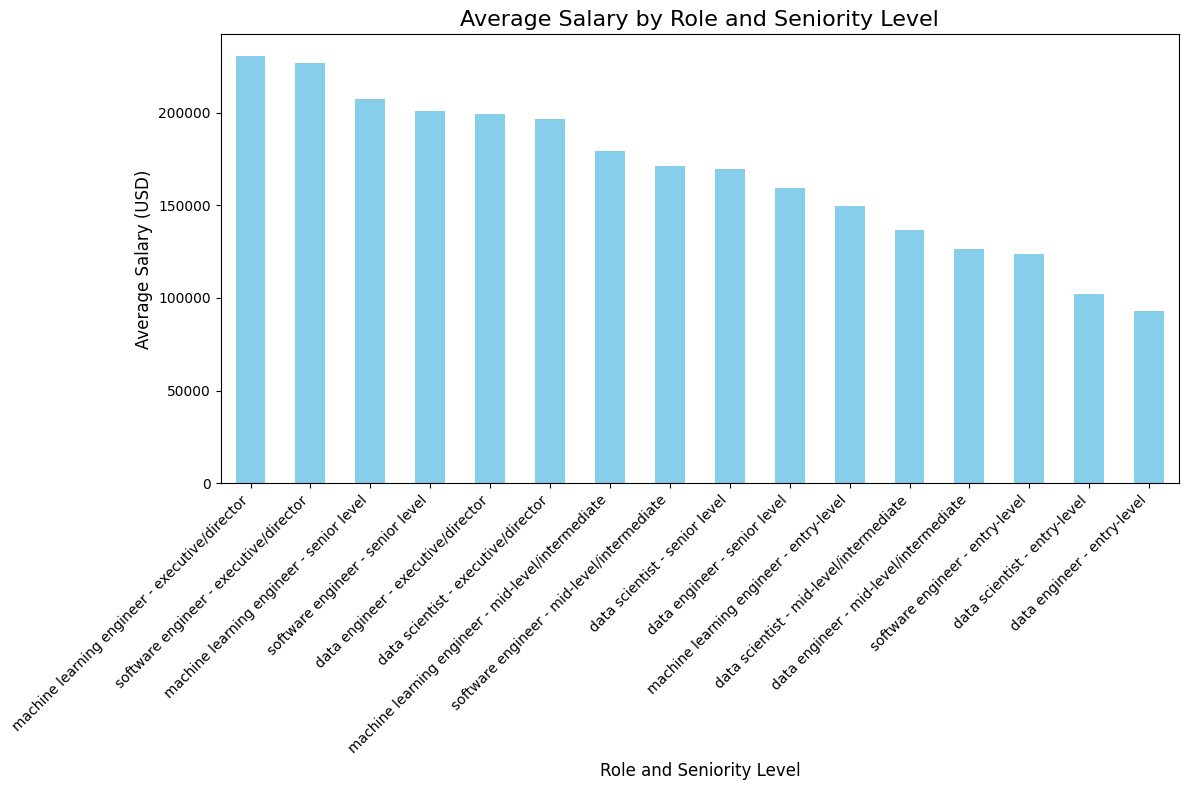

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

average_salary_by_role = (joined_df.groupby('salary_role_level')['salary_in_usd']
    .mean().sort_values(ascending=False))

plt.figure(figsize=(12, 8))
average_salary_by_role.plot(kind='bar', color='skyblue')
plt.title('Average Salary by Role and Seniority Level', fontsize=16)
plt.xlabel('Role and Seniority Level', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

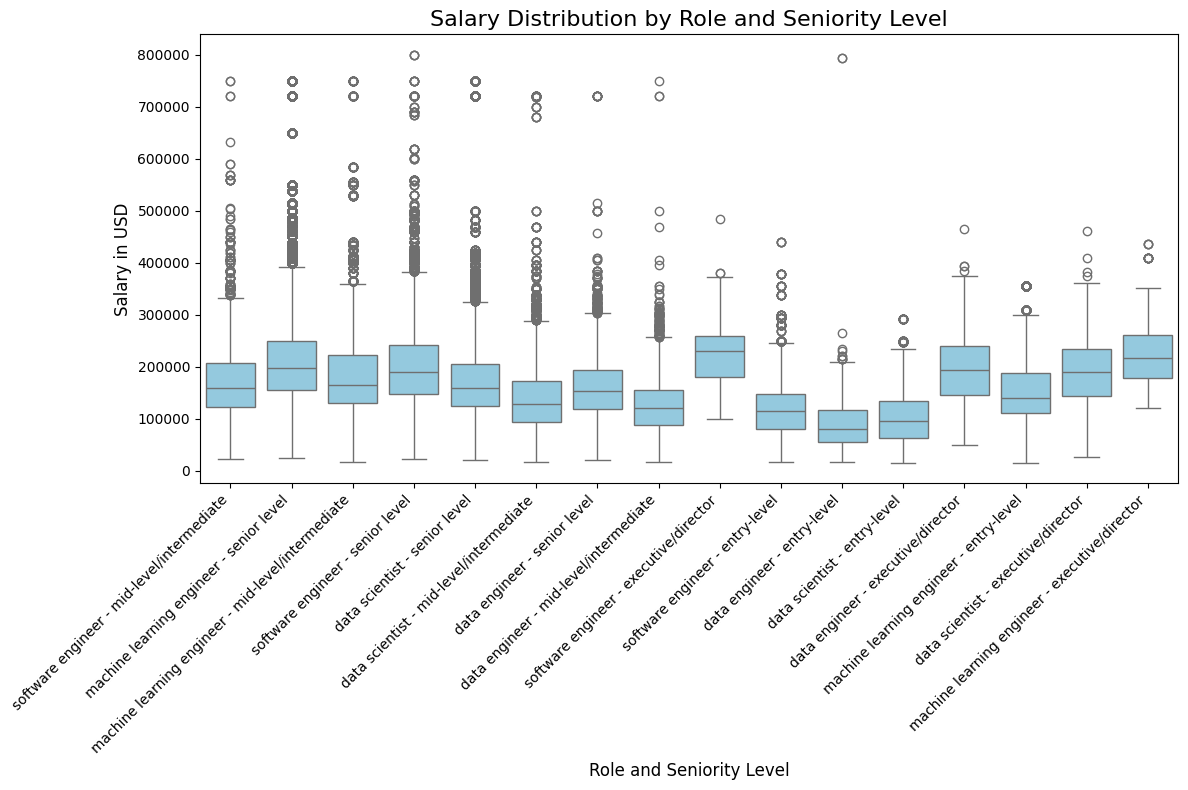

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(data=joined_df, x='salary_role_level', y='salary_in_usd', color='skyblue')
plt.title('Salary Distribution by Role and Seniority Level', fontsize=16)
plt.xlabel('Role and Seniority Level', fontsize=12)
plt.ylabel('Salary in USD', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

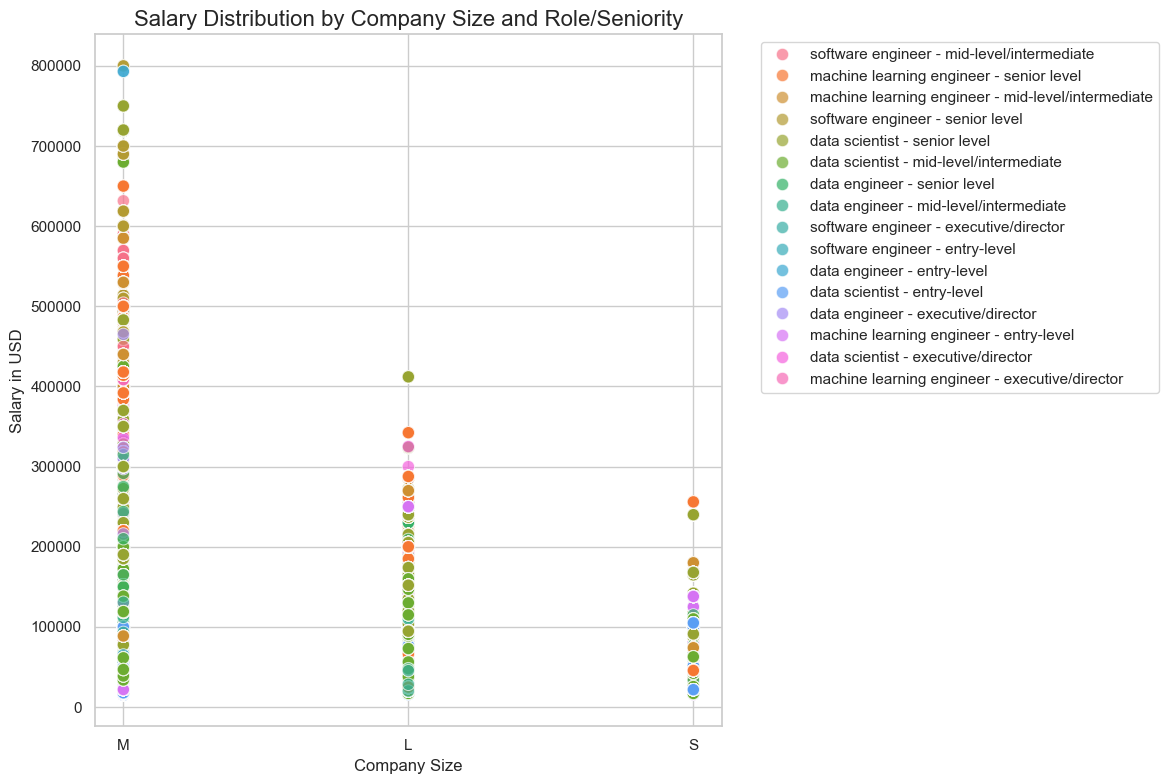

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(data=joined_df, x='company_size', y='salary_in_usd', hue='salary_role_level', alpha=0.7, s=80)

plt.title('Salary Distribution by Company Size and Role/Seniority', fontsize=16)
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Salary in USD', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Adding a fourth visualization to better depict the salary distribution for role/seniority level by company size.

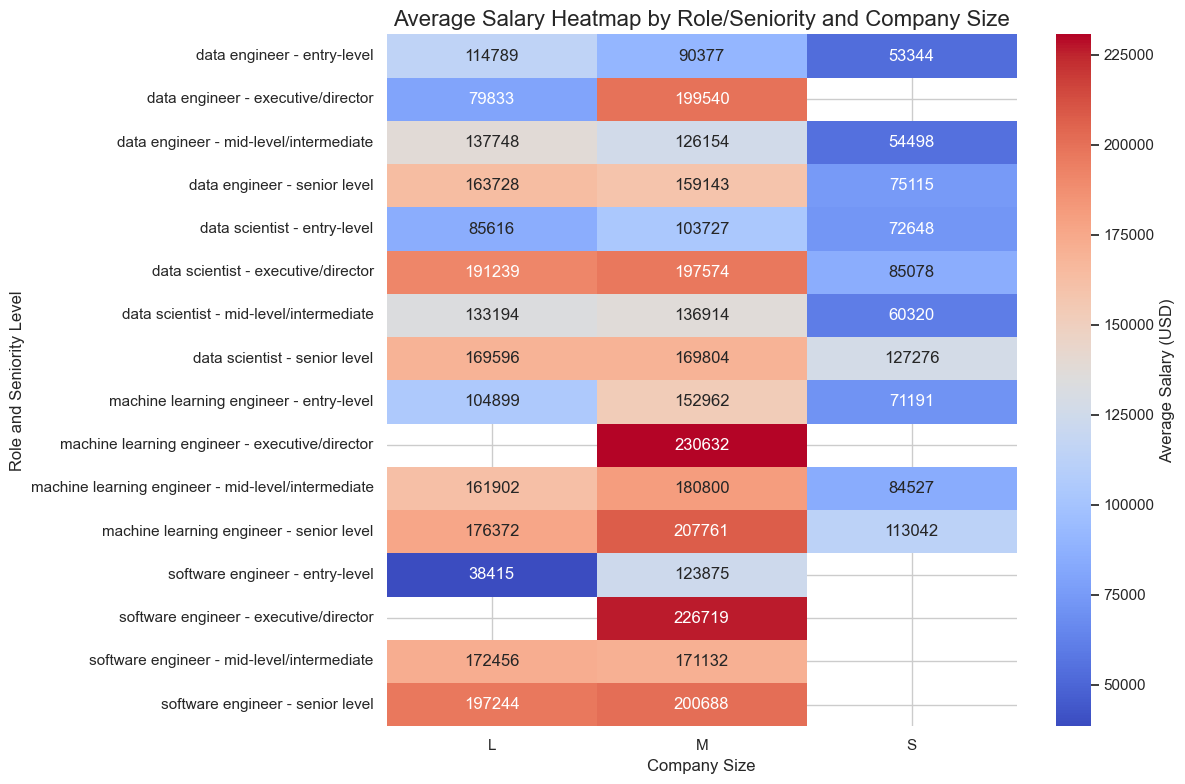

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

heatmap_data = (
    joined_df.groupby(['salary_role_level', 'company_size'])['salary_in_usd']
    .mean()
    .reset_index()
    .pivot(index='salary_role_level', columns='company_size', values='salary_in_usd')
)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='coolwarm', cbar_kws={'label': 'Average Salary (USD)'})
plt.title('Average Salary Heatmap by Role/Seniority and Company Size', fontsize=16)
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Role and Seniority Level', fontsize=12)
plt.tight_layout()
plt.show()
